# 자연어 처리와 텍스트 데이터 활용<br> - Word Cloud, Word Embedding

## 워드 클라우드 그리기 예제

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)


# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'


# local data path
# localdataPath = 'C:/YONG/m1710/myPydata/'

In [2]:
# 미리 wordcloud 설치 필요
# pip install wordcloud

<class 'dict'>


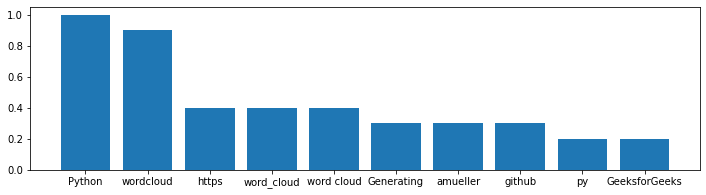

In [56]:
from wordcloud import WordCloud

# test_text.txt 파일에는 구글에서 python word cloud라고 검색해서 나온 내용들을 
# 연습용으로 저장

# 로컬에서 여는 경우
# text = open(localdataPath + 'test_text.txt').read()


from urllib.request import urlopen

# 원격에서 인터넷상의 파일을 여는 경우
path_url = "https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/"

import urllib3

http = urllib3.PoolManager()
url = path_url + 'test_text.txt'
response = http.request('GET', url)
text = response.data.decode('ANSI')


# 워드클라우드 생성
wordcloud = WordCloud().generate(text)
print(type(wordcloud.words_))
wordcloud.words_.values()

# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0, ascending=False).head(10)

plt.figure(figsize=(12,3))
plt.bar(dfwcw01.index, dfwcw01[0])
plt.show()


https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/ML_text.txt [data source : Github Path]

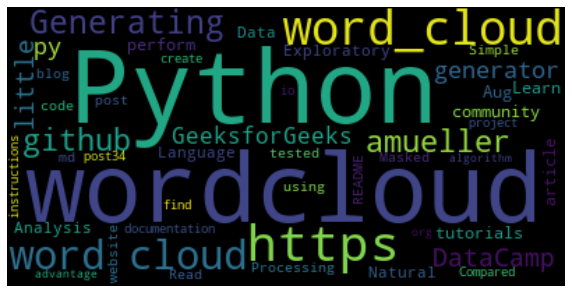

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
##  to check out .... for more
# https://www.datacamp.com/community/tutorials/wordcloud-python 
# https://pinkwink.kr/1029  한글 활용 내용 포함 (마스크 활용 포함)
# https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

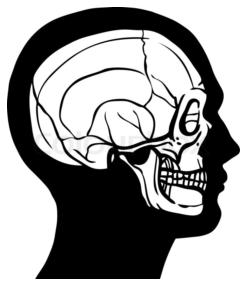

<class 'dict'>


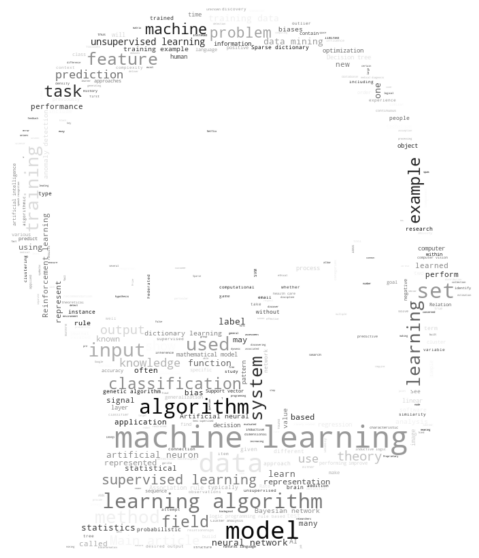

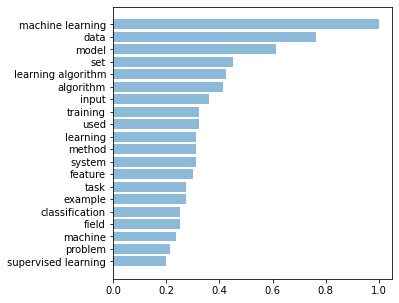

In [94]:
from wordcloud import WordCloud
from PIL import Image
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 100)



# test_text.txt 파일에는 구글에서 [machine learning] 을 검색해서 나온 내용들을 
# 연습용으로 저장
# text = open(locadataPath + 'ML_text.txt').read()

# 원격에서 인터넷상의 파일을 여는 경우
path_url = "https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/"

import urllib3

http = urllib3.PoolManager()
url = path_url + 'ML_text.txt'
response = http.request('GET', url)
text = response.data.decode('ANSI')



# 마스크 용으로 사용할 이미지 파일 불러오기
# url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/triangle.png'
# url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/circle.png'
url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/human_head.jpg'

from PIL import Image
from skimage import io

img = io.imread(url) # returns np array
ML_mask = img

    
# 화면에 마스크용 이미지 출력해 확인
plt.figure(figsize=(5,5))
plt.imshow(ML_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# alternatively
# io.imshow(img) # 이미지를 화면 출력


wordcloud = WordCloud(max_font_size=200, max_words=3000, mask=ML_mask, 
                      background_color="white").generate(text)
print(type(wordcloud.words_))
wordcloud.words_.values()


# 화면에 워드클라우드 출력
plt.figure(figsize=(20,10)) # 선명하게 하기 위해 사이즈 조절
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()


# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0).tail(20)
# 오름차순 정렬 후 마지막 일부를 추출

plt.figure(figsize=(5,5))
plt.barh(dfwcw01.index, dfwcw01[0], alpha=0.5)
plt.show()

In [97]:
# matplotlib 에서 한글을 표시하기 위한 설정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

# Import data
# csv file import example
# 한글 데이터의 경우 미리 인코딩을 UTF-8로 변경해두면 문제 발생 방지 

<class 'dict'>


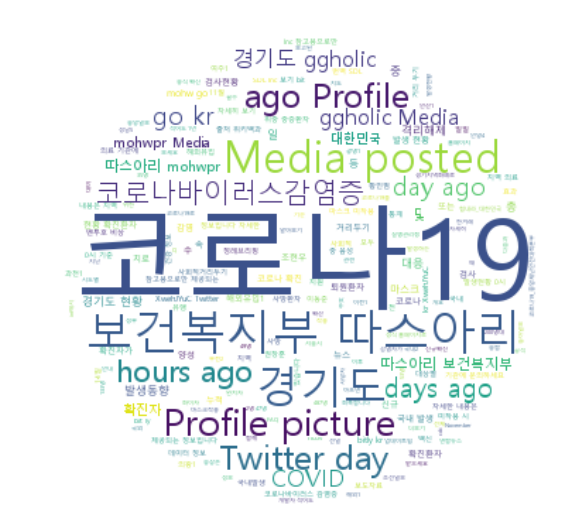

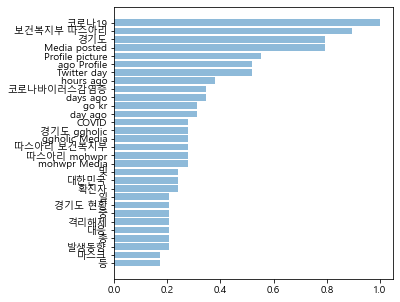

In [100]:
# 구글에서 [코로나] 를 검색해서 나온 내용들을 연습용으로

path_url = "https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/"

import urllib3

http = urllib3.PoolManager()
url = path_url + 'corona_text.txt'
response = http.request('GET', url)
text = response.data.decode('ANSI')

# 로컬의 데이터 파일 여는 경우
# text = open(localdataPath + 'corona_text.txt').read()

# 마스크 선택 
from PIL import Image
from skimage import io

url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/circle.png'
img = io.imread(url) # returns np array
ML_mask = img


# 한글폰트 위치 지정 필수
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
    max_font_size=100, max_words=3000, mask=ML_mask, 
    background_color="white").generate(text)
print(type(wordcloud.words_))
# wordcloud.words_.values()


plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0).tail(30)
# 오름차순 정렬 후 마지막 일부를 추출

plt.figure(figsize=(5,5))
plt.barh(dfwcw01.index, dfwcw01[0], alpha=0.5)
plt.show()

In [101]:
# 명사 형의 단어만 추출

from konlpy.tag import Okt # 오픈소스 한국어 형태소 분석기 (과거 Twitter)
from collections import Counter

data = text
okt = Okt()   
noun = okt.nouns(data)
for i,v in enumerate(noun):
    if len(v) < 2:
        noun.pop(i) # remove item
count = Counter(noun)
noun_list = count.most_common(100)
noun_list[:5]

[('코로나', 40), ('경기도', 39), ('발생', 29), ('현황', 28), ('보건복지부', 26)]

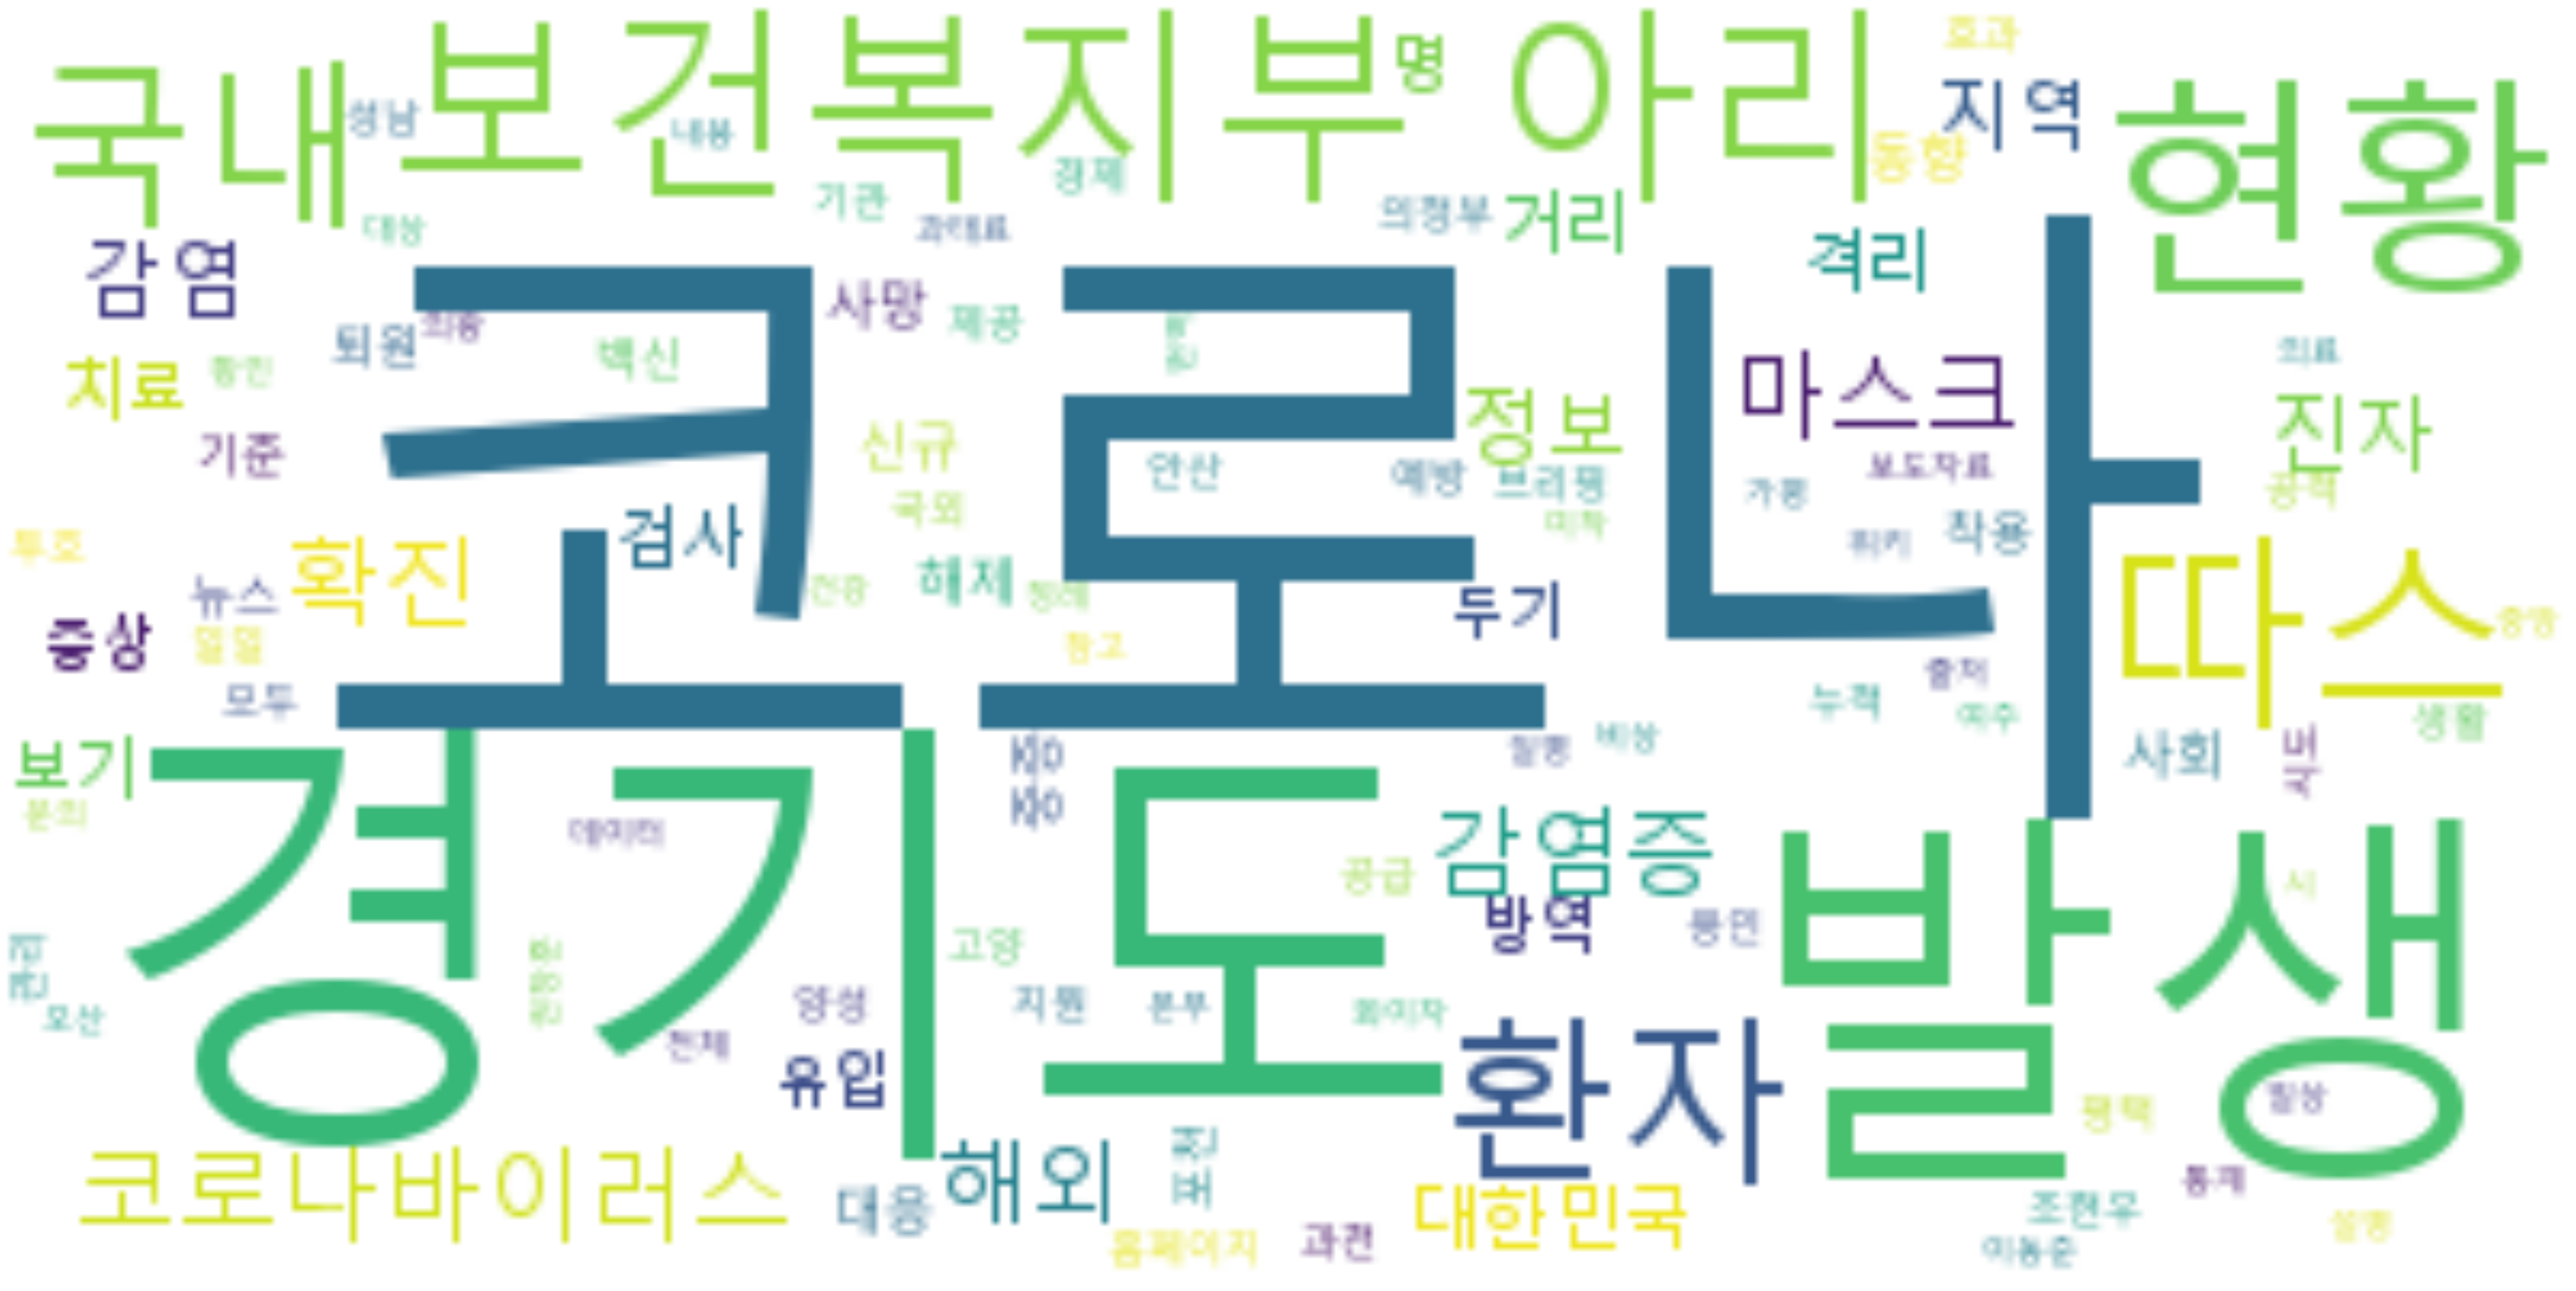

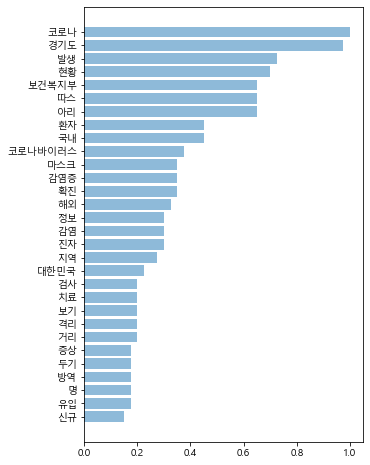

In [102]:
# 워드클라우드 생성

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      max_font_size=100, max_words=3000, 
                      # mask=ML_mask, 
                      background_color='white'
                     ).generate_from_frequencies(dict(noun_list))
# print(type(wordcloud.words_))
# wordcloud.words_.values()

plt.figure(figsize=(100,100))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0).tail(30)
# 오름차순 정렬 후 마지막 일부를 추출

plt.figure(figsize=(5,8))
plt.barh(dfwcw01.index, dfwcw01[0], alpha=0.5)
plt.show()

### Word Embedding

- 단어들에 좌표를 부여 (= 벡터화)
- Word2Vec은 입력층과 출력층 사이에 hidden layer 대신 projection layer 하나만 존재하는 shallow NN
- CBOW는 주변단어들로부터 중심단어를 추측. Skipgram은 반대로 중심단어로 주변단어를 추측하는 방식
- W2V 는 NNLM(Neural Net Language 모델)의 느린 학습속도를 개선하고 다음 단어 대신 중심단어 의미를 수치화하는 것

- 한글 설명 on W2V :  https://wikidocs.net/22660

667
<class 'pandas.core.series.Series'>
기사내용 예: 
 0    강남 이젠아카데미컴퓨터학원, API활용 빅데이터 지도 시각화·텐...
1                 [특별기고] 머신러닝 도입을 위한 4가지 비법
2     ‘주경야독 직업전문학교’ 머신러닝, 딥러닝 컴퓨터비전 실무 과...
3        메타넷티플랫폼-에이아이더, 클라우드 기반 머신러닝 서비스 협력
Name: news_title, dtype: object
[['강남', '아카데미', '컴퓨터', '학원', '활용', '빅데이터', '지도', '시각'], ['특별', '기고', '머신', '러닝', '도입', '가지', '비법'], ['주경야독', '직업', '전문학교', '머신', '러닝', '러닝', '컴퓨터', '실무']] 667
:: W2V model created
:: 


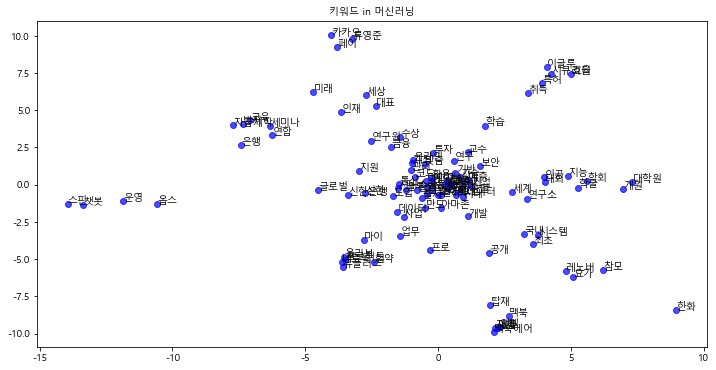

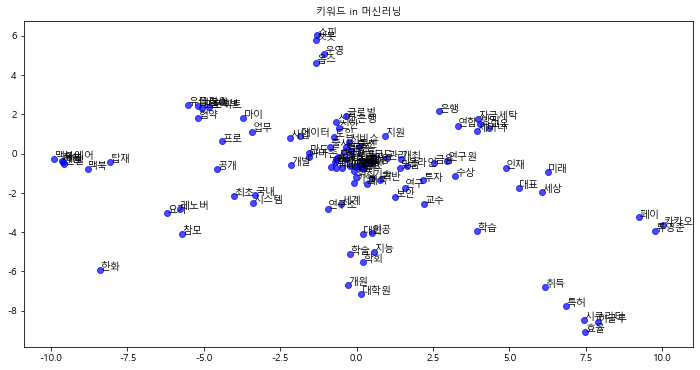

similarity between words
sim('머신', '러닝') 0.9939848
sim('데이터', '러닝') -0.6998561


job       vec1         vec2        vec3
36   한화   8.963463   -8.3982115  -5.9216185
52  대학원   7.306148   0.15031454  -7.1640215
53   개원  6.9718986  -0.28831872  -6.6771226
38   참모   6.210071     -5.71706  -4.0715203
16   학회  5.5935235   0.22384654  -5.5465364

In [589]:
# Word2Vec using gensim 
###########################

# import tensorflow as tf
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd # pandas 데이터 입출력 
from gensim.models import Word2Vec
from gensim.models import doc2vec
from nltk.cluster import KMeansClusterer
from konlpy.tag import Okt
import nltk
import pylab


sentences = pd.read_csv(dataPath +'MLnews_sample.csv').news_title
sentences = fnNews.news_title

print(len(sentences)) # ML 관련 400건 뉴스의 타이틀 리스트
print(type(sentences))

print('기사내용 예: \n', sentences[:4])

min_count=10  # min frequency
iter=2000 # or 10000? 얼마나 큰 숫자가 적정?
# size=50  # num of dimension
size=3 
window=3  # skip gram window size - typical
sg=0 # 0 : CBOW ;  skipgram : 1

# CBOW는 중앙 단어의 앞 뒤 단어를 고려해서 중앙에 있는 단어를 추측
# Skip-Gram은 중앙에 있는 단어를 통해서 중앙 단어의 앞 뒤 단어들을 추측

twitter = Okt()
 
sentences_tag = []

sentencesa = sentences.tolist()

for sentence in sentencesa:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
 
 
noun_adj_list = []

# 의미상 불필요한 제거 대상 단어 목록
# 제거하는 단어 리스트 구성에 따라 전체 결과가 달라짐
stopWords = ['러닝머신','기구', '런닝머신', '기구']

for sentence1 in sentences_tag:
    noun_adj_list_snt = []
    for word, tag in sentence1:
        # 명사와 형용사 두 가지 종류의 품사에 해당하는 단어만 포함
        # 한글자 길이의 단어는 무시
        if (tag in ['Noun', 'Adjective']) and (len(word)>1) and (word not in stopWords):
            noun_adj_list_snt.append(word)
    noun_adj_list.append(noun_adj_list_snt)        
print(noun_adj_list[:3] , len(noun_adj_list))

# 형태소분석기에 따라 서로 다른 결과 생성. 단어를 자르는 기준 등에 차이 -- 시행착오 불가피

w_sentences = noun_adj_list

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1

# simple run
model = Word2Vec(w_sentences, min_count=min_count, size=size, window=window, sg=sg,
                iter=iter)

'''
# 모델 수렴 여부를 보기 위해 training loss를 출력하는 경우

model = Word2Vec(min_count=min_count, size=size, window=window, sg=sg)
model.build_vocab(w_sentences)
model.train(w_sentences,
            total_examples=model.corpus_count,
            epochs=iter,
            compute_loss=True, 
            report_delay=1,
            callbacks=[callback()])
'''

print(":: W2V model created")
print(":: ")


X = model[model.wv.vocab]
vocab = list(model.wv.vocab.keys())
# print('vocab = \n', vocab)


fig, ax = plt.subplots(figsize=(12,6))
pylab.title('키워드 in 머신러닝', size=10)
plt.scatter(X[:,0], X[:,1], alpha=0.7, c="blue")
x = list(X[:,0])
y = list(X[:,1])
z = vocab
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i]+0.01, y[i]+0.01), size=10)
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
pylab.title('키워드 in 머신러닝', size=10)
plt.scatter(X[:,1], X[:,2], alpha=0.7, c="blue")
x = list(X[:,1])
y = list(X[:,2])
z = vocab
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i]+0.01, y[i]+0.01), size=10)
plt.show()

# 이미지를 파일로 Export -- 해상도 조절
# fig.savefig(localdataPath + 'fig_word2vec001.png', dpi=200)
# print("[] fig saved")

# get similarity between words
print("similarity between words")

print("sim('머신', '러닝')", model.wv.similarity('머신', '러닝'))
print("sim('데이터', '러닝')", model.wv.similarity('데이터', '러닝'))


# 데이터프레임에 벡터 생성 결과 저장
df_senvoc = pd.DataFrame(np.column_stack([z, X[:,0], X[:,1], X[:,2]]),
     columns=["job","vec1","vec2","vec3"]) 
df_senvoc.sort_values('vec1', ascending=False)[:5]

In [592]:
# check out std of each diemnsion
# 변동이 더 큰 dimension이라면 중요도가 클 것으로 기대

df_senvoc_cv = df_senvoc[df_senvoc.columns[1:]].apply(pd.to_numeric).apply(mnmx_scl)
display(df_senvoc_cv.std() / df_senvoc_cv.mean())

# dimension별 차이가 있으나 ... 그리 크지는 않음

print('correlation between dimensions:')
df_senvoc_cv.corr()

vec1    0.303282
vec2    0.429408
vec3    0.349249
dtype: float64

correlation between dimensions:


vec1      vec2      vec3
vec1  1.000000 -0.215112 -0.804201
vec2 -0.215112  1.000000 -0.329388
vec3 -0.804201 -0.329388  1.000000

- Word Embedding을 어디에 활용할 것인가? -- Map 자체로서도 가치있지만 단어(or Entity)를 수치화시켜 다른 모델 개발시 변수로 투입 가능
> 예1: 주식시장에서 종목별 관련뉴스로 부터 종목의 특성 수치화<br>
> 예2: 신용카드 가맹점에 대한 소셜 멘션으로 부터 가맹점 특성 수치화<br>
> 예3: 고객 클레임으로 부터 고객의 태도 수치화 또는 클레임의 유형 자동분류

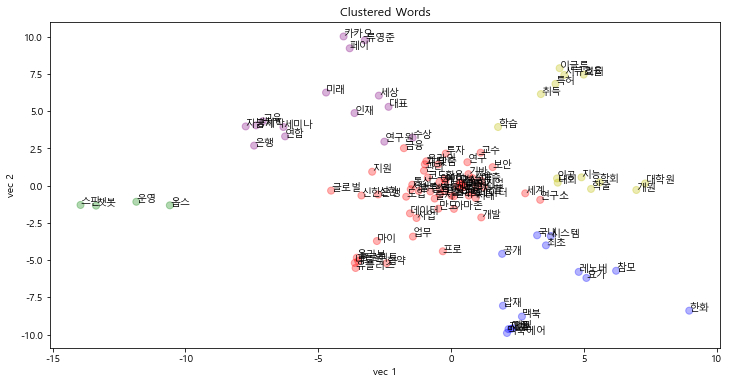

In [593]:
# Word Embedding Map에 클러스터링 적용

from sklearn.cluster import KMeans  

df_senvoc_cl = df_senvoc[df_senvoc.columns[1:]].apply(pd.to_numeric).copy()

# create k-means model
kmm1 = KMeans(n_clusters=5, random_state=11)  
kmm1.fit(df_senvoc_cl)  

df_senvoc_cl['clst'] = kmm1.labels_

colorlist = ['r', 'y', 'g', 'blue','purple']
colors1 = [colorlist[i] for i in  df_senvoc_cl['clst']]
plt.figure(figsize=(12,6))
plt.scatter(df_senvoc_cl.vec1, df_senvoc_cl.vec2,
           color=colors1, alpha=0.3, s=50)
plt.xlabel('vec 1')
plt.ylabel('vec 2')
plt.title('Clustered Words')

x = df_senvoc_cl.vec1
y = df_senvoc_cl.vec2
z = df_senvoc.job

for i in z.index:
    plt.text(x[i]+0.001, y[i]+0.001, z[i], size=10)
plt.show()


[응용 연습용 문제]
- 각 단어의 좌표를 평균하여 각 기사의 평균적 좌표를 구하고 그 것을 사용해서 각 기사를 분류해본다면?

In [594]:
import sys

# Warning 메시지가 표시되는 것을 보기 싫다면 설정
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

    
vec1sum = []
vec2sum = []
vec3sum = []

i=0
for x in noun_adj_list:
    # print(x)
    vec1list = np.array([df_senvoc[df_senvoc.job==z]['vec1'].values.astype(float).sum().astype(float) if z in df_senvoc.job.unique() else np.NaN for z in x])
    vec1sum.append(np.nanmean(vec1list))
    vec2list = np.array([df_senvoc[df_senvoc.job==z]['vec2'].values.astype(float).sum().astype(float) if z in df_senvoc.job.unique() else np.NaN for z in x])
    vec2sum.append(np.nanmean(vec2list))
    vec3list = np.array([df_senvoc[df_senvoc.job==z]['vec3'].values.astype(float).sum().astype(float) if z in df_senvoc.job.unique() else np.NaN for z in x])
    vec3sum.append(np.nanmean(vec3list))

    # 각 단어에 대응되는 값이 있으면 사용 아니면 NaN
    

sentences_cl = pd.DataFrame(sentences.copy())
sentences_cl['vec1mean']= vec1sum    
sentences_cl['vec2mean']= vec2sum    
sentences_cl['vec3mean']= vec3sum    

# na 없는 즉 좌표값이 정상적인 (=분류 의미 있는) 기사만 추출
sentences_cl = sentences_cl[~sentences_cl.isnull().any(axis=1)].sort_values(by='vec1mean')
display(sentences_cl.head())
sentences_cl.tail()


news_title   vec1mean  vec2mean  vec3mean
790   현대차그룹, 2022년 전 차종 커넥티드 카 운영 체제 적용 -11.849711 -1.080432  5.050860
146            베스핀글로벌, 챗봇 운영지원 '챗옵스' 출시  -8.266892 -0.757194  3.516279
323  베스핀글로벌, 챗봇 서비스 도입과 운영을 위한 ‘챗옵스’ 론칭  -8.212637 -0.907438  3.541254
75         베스핀글로벌, 챗봇 도입·운영 상품 '챗옵스' 출시  -8.083857 -0.996680  3.505164
283       베스핀글로벌, 챗봇 구축·운영 서비스 ‘챗옵스’ 출시  -8.059292 -0.925582  3.470534

news_title  vec1mean  vec2mean  vec3mean
133                  UNIST, 디지털 뉴딜 선도 ‘AI대학원’ 개원  5.019371 -0.202948 -4.852198
72             UNIST 인공지능(AI)대학원 개원식, 세계 10위권 목표  5.192228  0.080028 -5.085967
49                          유니스트, 인공지능(AI)대학원 개원  5.792820  0.228038 -5.719657
289                            UNIST, 인공지능대학원 개원  5.792820  0.228038 -5.719657
287  UNIST 인공지능대학원 개원!... 울산 AI 고급 인력양성 및 연구개...  5.792820  0.228038 -5.719657

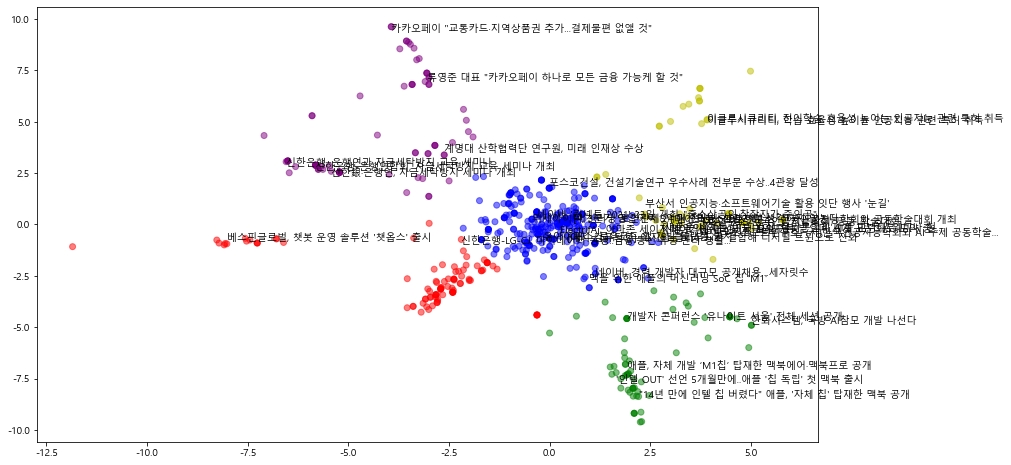

In [598]:
# 무작위 표본 추출 함수를 사용해서 소수의 일부 기사만 제목 표시

import random

selectindex = random.sample(list(sentences_cl.index), 30)
sentences_cl['tmp_title'] = ''
sentences_cl['tmp_title'] = [sentences_cl.news_title[x] if x in selectindex else '' for x in sentences_cl.index]


# 키워드가 아닌 기사 단위 클러스터링으로 색상 구분 표시

from sklearn.cluster import KMeans  

# create k-means model
kmm2 = KMeans(n_clusters=5, random_state=11)  
kmm2.fit(sentences_cl[sentences_cl.columns[1:4]])  

sentences_cl['clst'] = kmm2.labels_

colorlist = ['r', 'y', 'g', 'blue','purple']
colors1 = [colorlist[i] for i in  sentences_cl['clst']]


plt.figure(figsize=(14,8))
plt.scatter(sentences_cl.vec1mean, sentences_cl.vec2mean,
           color=colors1, alpha=0.5)

x = sentences_cl.vec1mean
y = rjitt(sentences_cl.vec2mean)
z = sentences_cl.tmp_title

for i in z.index:
    plt.text(x[i]-0.001, y[i]+0.001, z[i], size=10)
plt.show()    


[뉴스기사 클러스터링 결과] 
- 제목이 동일하지 않아도 의미나 단어가 유사한 것들이 유사한 영역에 묶임→ 의미 기반의 기사 분류
- 주의사항의 예: 러닝머신 == 머신러닝?

[기사 수집용 크롤링 임시]

In [557]:
#  임시 크롤링 스크립트 

import requests
from bs4 import BeautifulSoup


# 접속할 사이트(웹 서버) 주소


def get_link(p_url):
    html = requests.get(p_url).text.strip() # 요청의 결과(응답, response - HTML)를 저장
    # print(html[0:100]) # 전체 문자열에서 100자만 확인

    # BeautifulSoup 객체를 생성
    soup = BeautifulSoup(html, 'html5lib')

    # soup.select(css_selector): soup 객체에서 CSS 선택자로 요소들을 찾는 방법
    r_news_link = soup.select('.coll_cont ul li a.f_link_b')
    return r_news_link


In [587]:
kwd = '코로나'
kwd = '보험산업'
# kwd = '마이 데이터'
# kwd = '메이저리그'
kwd = '머신러닝'
nws_lst = []

# 사이트(웹 서버)로 요청(request)를 보냄
for page in range(1, 101):
    print('page:', page)
    url = f'https://search.daum.net/search?w=news&q='+kwd+ '&DA=PGD&spacing=0&p='+str(page)
    
    news_link = get_link(url)
    for link in news_link:
        nws_lst.append(link.text)
        # print(link.text)
        # print(link.get('href'))
    print(link.text)


fnNews = pd.DataFrame(np.array(nws_lst))



page: 1
포스텍, 항암제 치료효과 예측하는 머신러닝 기술 개발
page: 2
[화제의 현장] “머신러닝 자동화로 최적의 비즈니스 환경 지원”
page: 3
링크브릭스, '혁신기업 국가대표 1000' 정보통신 부문 선정
page: 4
위세아이텍, 온라인 세미나서 AI·머신러닝 혁신 사례 공유
page: 5
유니스트, 인공지능(AI)대학원 개원
page: 6
[이슈] KAIST 박사과정 공태식 연구원... 구글 AI, 'PhD 펠로우십...
page: 7
알리바바 클라우드, 올해 광군제서 초당 58만 건 주문 처리
page: 8
마이크로소프트연구소, 한국인공지능학회와 공동학술대회 개최
page: 9
값비싼 머신러닝 교육 저리 가라! 머신러닝 개발자 양성 위한 구...
page: 10
[if kakao] 카카오페이 금융 키워드 '개인'...맞춤형 투자-보험 ...
page: 11
머신러닝 활용한 금속수소 연구로 목성 내부 탐사 앞당긴다
page: 12
UNIST 인공지능대학원 개원..동남권 디지털 뉴딜 이끈다
page: 13
크라우드웍스, '혁신기업 국가대표 1000' 정보통신부문 선정
page: 14
체크포인트 "SASE로 재택·원격근무 환경 보안 책임진다"
page: 15
K-방역 열풍 타고 방역용품 세계로 수출
page: 16
마이크로소프트연구소, 한국인공지능학회와 공동학술대회 개최
page: 17
"누구나 쉽게 머신러닝 활용하는 세상 돼야죠"
page: 18
코드스테이츠, 'AI 부트캠프' 개최..AI 인재 육성 나선다
page: 19
[경향의 눈] 내게 뉴스를 추천하지 말라
page: 20
유통+통신+금융 '초개인화' 디지털서비스
page: 21
어도비, 프리미어 러시·프로 업데이트...영상 콘텐츠 제작 기능 ...
page: 22
[시그널] 규제 없는 실리콘밸리가 'K-유니콘' 키웠다
page: 23
숭실대 권민혜 교수팀, 동물 의사결정 기반한 심층강화학습 기법 ...
page: 24
구글코리아, '머신러닝 부트캠프' 진행…개발자 양성해 기업 채용.

In [588]:
fnNews = pd.DataFrame(np.array(nws_lst))
fnNews.columns = ['news_title']
fnNews = fnNews.drop_duplicates()
fnNews

# localdataPath = 'C:/YONG/m1710/myPydata/'
# fnNews.to_csv(localdataPath+'insuranceindNews.csv', encoding='utf-8')
# pd.read_csv(localdataPath+'insuranceindNews.csv', index_col=0).head()

# pd.read_csv(localdataPath+'MLBnews.csv', index_col=0).head()

news_title
0               강남 이젠아카데미컴퓨터학원, API활용 빅데이터 지도 시각화·텐...
1                            [특별기고] 머신러닝 도입을 위한 4가지 비법
2                ‘주경야독 직업전문학교’ 머신러닝, 딥러닝 컴퓨터비전 실무 과...
3                   메타넷티플랫폼-에이아이더, 클라우드 기반 머신러닝 서비스 협력
4                            맥을 위한 애플의 머신러닝 SoC 칩 'M1'
..                                                 ...
795  AMD, AI용 CDNA GPU '인스팅트 MI100' 발표…"엔비디아 2배 이상 ...
796             생활습관 활용한 '머신러닝'으로 5년 후 폐암 환자 사망 94% 예측
797          ’대만 TSMC 반드시 넘는다‘ 삼성전자, 2년 내 3나노미터 반도체...
798               현대자동차그룹, 세계적 인공지능(AI) 기업 엔비디아와 기술 협력
799                        번개장터 "구글 플레 쇼핑 인기 차트 1위 기록"

[667 rows x 1 columns]

[추가 연습용 데이터셋] 
- 머신러닝 관련 유튜브 영상 제목 리스트

In [586]:
pd.read_csv(dataPath + 'ML_youtube_sample.csv').title.head()

0    [리얼밸리 EP 05] 머신러닝, 딥러닝 초간단 설명 - 길이: 7:13EO1년 전...
1    머신러닝, 딥러닝, 빅데이터가 도대체 뭐야? ft. 스탠포드 박사 - 길이: 10:...
2    머신러닝 1시간으로 입문하기 - 길이: 55:44Terry TaeWoong Um3년...
3    머신러닝 vs 딥러닝 vs 인공지능? A.I. 개념정리! - 길이: 7:46노마드 ...
4    머신러닝의 기초 - 선형 회귀 한 번에 제대로 이해하기 (30분만 투자해봐요!) -...
Name: title, dtype: object